# Lab 4: Working with 'real' data
Lab done by: Lexie Peterson  
Partner: Kun Lee

In [68]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit as cv

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))

In [4]:
def binPlot(dataX, dataY, numBins, start, end):
    npDataX = np.array(dataX[start:end])
    npDataY = np.array(dataY[start:end])
    start = start
    location = start
    finish = end
    binDataX = np.empty(numBins)
    binDataY = np.empty(numBins)

    binsArrX = np.array_split(npDataX, numBins)
    binsArrY = np.array_split(npDataY, numBins)
    
    index = 0
    for arr in binsArrX:
        binDataX[index] = np.average(arr)
        index += 1
        
    index = 0
    for arr in binsArrY:
        binDataY[index] = np.average(arr)
        index += 1
        
    return [binDataX, binDataY]

## Problem 1
In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [5]:
#splitting the variables into individual arrays
time        = data[0]
solar_phase = data[1]
longitude   = data[2]
counts      = data[3]

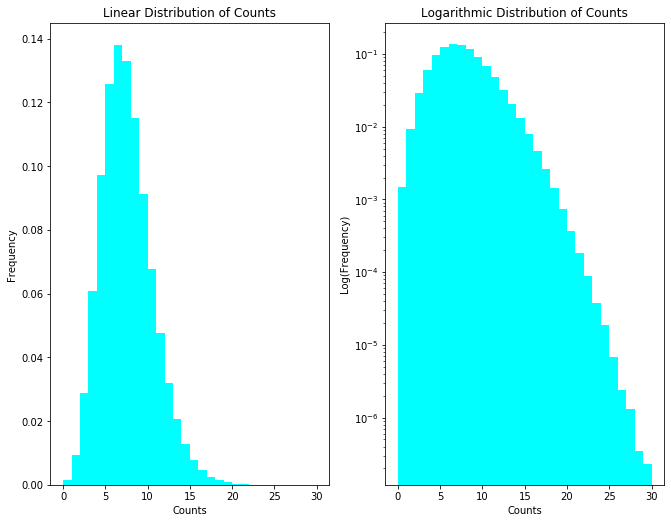

In [27]:
#plotting the distribution of cosmic ray counts
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)

ax[0].hist(counts,bins=30, color='cyan', density=True)
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Linear Distribution of Counts")

ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Log(Frequency)")
ax[1].set_title("Logarithmic Distribution of Counts")
ax[1].set_yscale("log")
ax[1].hist(counts, bins=30, color='cyan', density=True);

The left plot is a linear plot of our distribution while the right is a logarithmic plot of the background distribution, plotted so that we can get a better sense of how the tails are acting. The distribution of the cosmic-ray counts looks to be a poisson distibution. This makes sense since the signal is discrete, we detect a cosmic-ray or we don't, and we are detecting a number of counts per a time period. The time period in this instance is 100 milliseconds and the amount of rays per 100 milliseconds is around 7 (where the peak of the distribution appears). It would be nice to work simply with this, but the added dimensionallity of this problem (time, solar phase, Earth longitude) the distribution is not constant with time. We can see this as I continue to explore the data through plots.

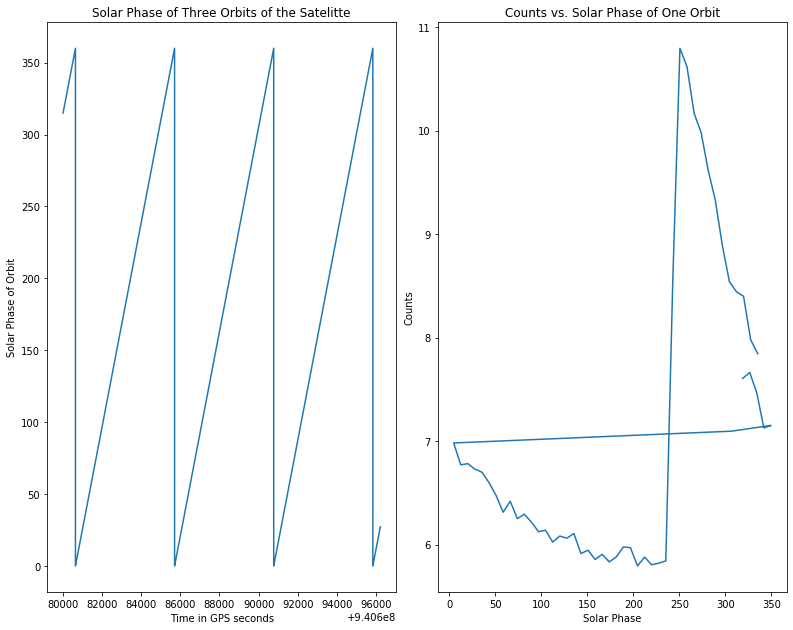

In [43]:
one_orbit = (90 * 60 * 10) #How much data points is taken in one_orbit
bindata1 = binPlot(solar_phase, counts, 50, 0, one_orbit)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout();
ax[0].plot(time[0:one_orbit*3], solar_phase[0:one_orbit*3])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Solar Phase of Orbit")
ax[0].set_title("Solar Phase of Three Orbits of the Satelitte")
ax[1].plot(bindata1[0], bindata1[1])
ax[1].set_xlabel("Solar Phase")
ax[1].set_ylabel("Counts")
ax[1].set_title("Counts vs. Solar Phase of One Orbit");

The first graph, the one on the left, shows how the solar phase changes over time. As expected, since in the satelitte's frame the sun is moving in a circular orbit, it is a simple cycle increasing linearly from 0 to 360. The interesting part of the solar phase comes from plotting the phase versus counts (right graph above). First and formost most important features to note, is that the graph starts plottig when the phase is around 300, so when the phase reaches 360 and thus zero, the plot seems to jump to the right. So, this straight, horizontal line can be essential discarded as it is just a unwanted by-product of where in the phase our data started. Next important feature to note, is the spike in counts when the solar phase is around 250 and then the seemingly exponential drop off in counts. Although not shown, this is a repeative feature. Everytime when the solar pahse is around 250 it takes a sharp increase then exponential decays. I am unsure of the physics causing the spike and decay, but it is a sure sign our signal is being contaminated since it is changing with the solar phase.

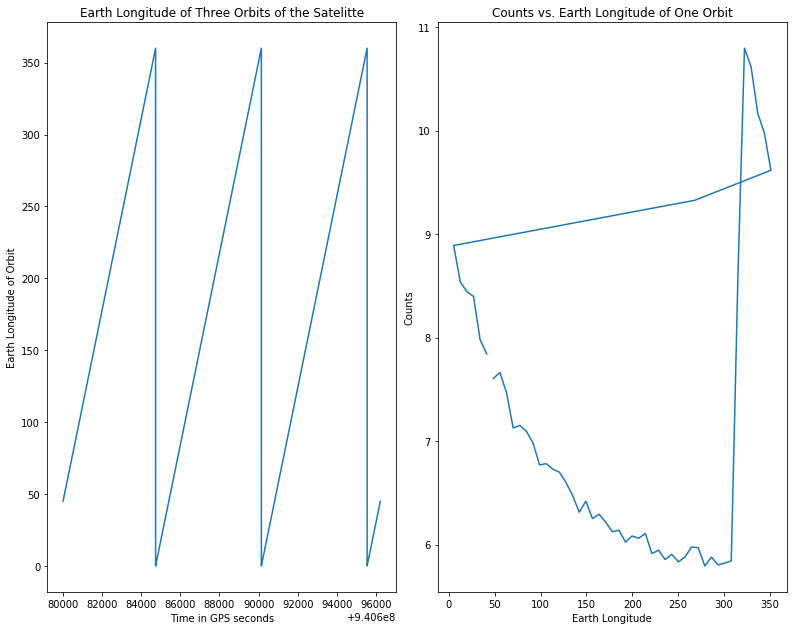

In [45]:
bindata2 = binPlot(longitude, counts, 50, 0,one_orbit)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout();
ax[0].plot(time[0:one_orbit*3], longitude[0:one_orbit*3])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Earth Longitude of Orbit")
ax[0].set_title("Earth Longitude of Three Orbits of the Satelitte")
ax[1].plot(bindata2[0], bindata2[1])
ax[1].set_xlabel("Earth Longitude")
ax[1].set_ylabel("Counts")
ax[1].set_title("Counts vs. Earth Longitude of One Orbit");

The first graph, the one on the left, shows how the longitudinal position of the satelitte changes over time. As expected, since the satelitte is moving in a circular orbit around Earth, it is a simple cycle increasing linearly from 0 to 360. This graph is plotted to show the cyclic nature of the orbit. Similar the solar phase versus counts, the longitude versus counts graph (above right plot) starts plotting at a none-zero degree, causing the plot to jump to the right when it reaches 360. So, this straight, horizontal line can be essential discarded as it is again just a unwanted by-product of where longitudinally our data started. Also interesting, similar to the phase plot, is the spike in counts when the longitude is around 300 and then the seemingly exponential drop off in counts.  I am unsure of the physics causing the spike and decay, but once again it is a sure sign our signal is being contaminated since it is changing with the longitudinally.

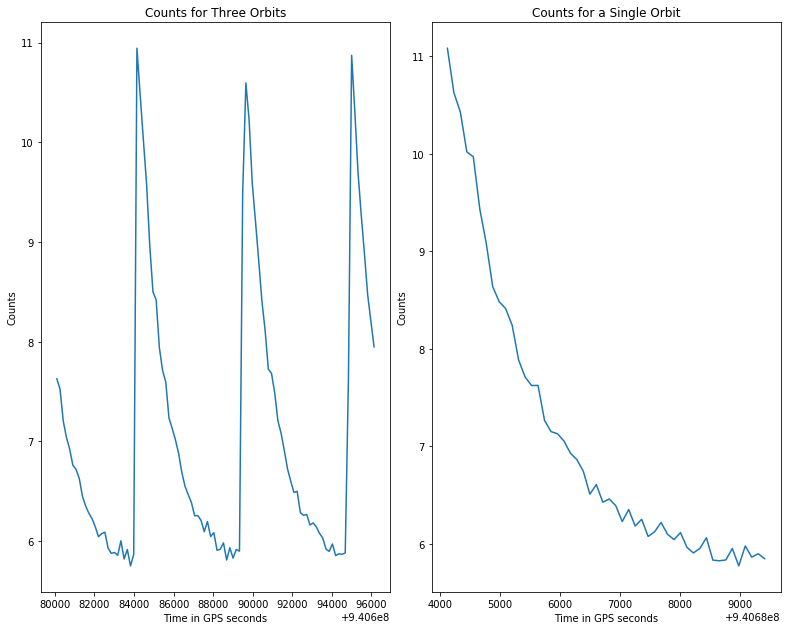

In [56]:
bindata3 = binPlot(time, counts, 50, 40500, 40500 + one_orbit)
bindata4 = binPlot(time, counts, 100, 0,one_orbit*3)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout()
ax[0].plot(bindata4[0], bindata4[1])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Counts")
ax[0].set_title("Counts for Three Orbits")

ax[1].plot(bindata3[0], bindata3[1])
ax[1].set_xlabel("Time in GPS seconds")
ax[1].set_ylabel("Counts")
ax[1].set_title('Counts for a Single Orbit');

Both plots above show how the number of counts changing with time. The left plot shows changes over the first three orbits, while the right plot shows a chunk of time equal to one orbit but starts at the peak in counts not somewhere in the middle of the decay. Similar to the graphs of solar phase and Earth longitude, the counts follow the cyclic pattern of time. The counts peak around 11 counts, decay to around 6 counts, then spike back up to around 11 counts. This will be useful for us to redefine our background distribution so that it includes this exponential time dependence. To do this, we can cut the data into chunks similar to the right-hand graph, sum all these chunks, then average them to get general shape for how the counts change.

Text(0, 0.5, 'Counts')

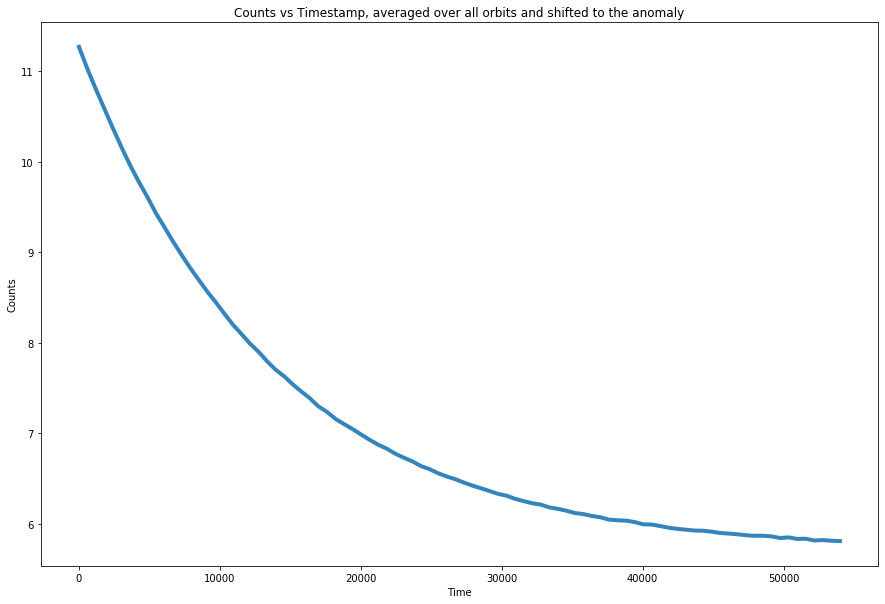

In [67]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
size = 90
total_orbits = 0
average_counts = np.zeros(size)
anomaly_location = 40500 #index where the first jump occurs

while total_orbits < (round(len(counts) / one_orbit) - 1):
    [orbit_x, orbit_y] = binPlot(time, counts, size, (total_orbits*one_orbit)+anomaly_location, 
                                 ((total_orbits + 1)*one_orbit) + anomaly_location)
    average_counts += (orbit_y)
    total_orbits += 1
    
average_counts /= total_orbits

ax.plot(np.linspace(0, one_orbit, average_counts.size), average_counts, linewidth = 4, alpha = 0.9)
ax.set_title("Counts vs Timestamp, averaged over all orbits and shifted to the anomaly")
ax.set_xlabel("Time")
ax.set_ylabel("Counts")

The graph above is the result of breaking the data into chunks starting from the first spike, the anomaly, then ending right before the next spike. As predicted in earlier graphs, the change in counts does seem to follow an exponential decay. So the next step will be to fit a line to our data. An exponential decay will follow the form of: $ f(x) = ae^{-bx} + c $.

In [71]:
def expon_func(x, a, b, c):
    return a*np.exp(-b*x)+c

p_opt, pcov = cv(expon_func, np.linspace(0, one_orbit, average_counts.size), average_counts, p0=(4, 0.00002, 5))

p_opt

array([5.56987054e+00, 7.31677610e-05, 5.69830999e+00])

From fitting our curve, our time dependence is now defined by this exponential function:  
$ f(t) = 5.569 + e^{(7.316\times 10^{-5}t + 40500)mod54000} + 5.698 $  
The added 40500 is the anomaly offset while 54000 is the amount of data points contained in one orbit.
Now that we have a model, we need to check how accurate this model is by comparing it with the data. We can do this by finding the coefficient of determination, of the "R-Squared" value, which is the proportion (ranging from 0-1) of the variance in the data that is predictable by our model. The closer R-squared is to 1, the better our model is.

In [76]:
def r_squared(y_expected, y_actual):
    y_bar = sum(y_actual) / y_actual.size
    ss_tot = sum((y_expected - y_bar)**2)
    ss_res = sum((y_actual - y_expected)**2)
    return 1 - (ss_res / ss_tot)

x_model = np.linspace(0, one_orbit, average_counts.size)
y_model = expon_func(x_model, p_opt[0], p_opt[1], p_opt[2])

r = r_squared(y_model, average_counts)
r

0.9999892342096155

Our model turned out to have an R-squared value of 0.999989, which is close to one, and thus a rather decent model. we can thus conclude we have a workable model, but that isn't the end of the story. We started with a poisson distribution for our counts. We still have a poisson distribution, it is just that due to the time dependence the mean of that poisson will change with the model we have just created. Since our mean changes with time, the significance of descovery of a signal will also change. In order for us to distinguish between cosmic-rays and gamma-rays at different times, it will be helpful to plot how '5$\sigma$' changes with time.

Text(0, 0.5, 'Counts')

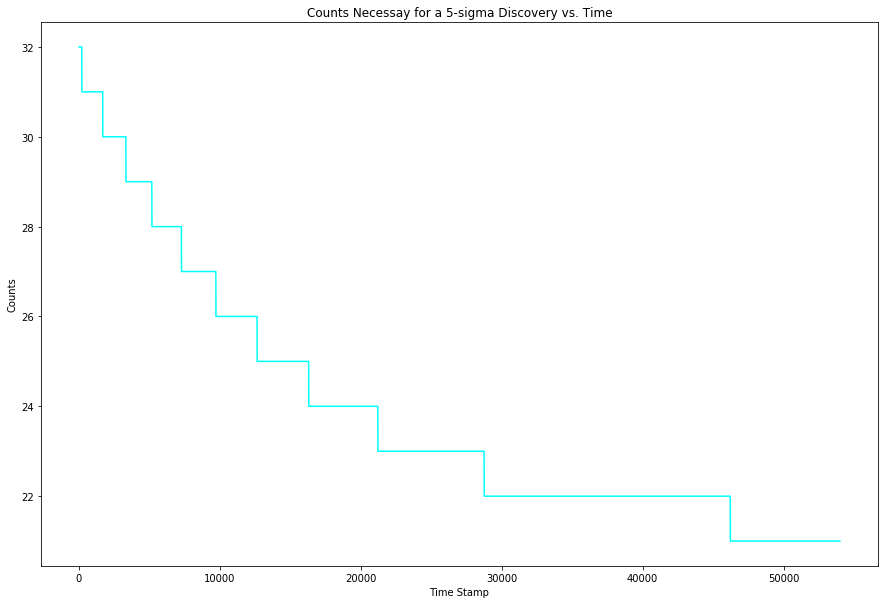

In [85]:
fiveSigmaProb = stats.norm.cdf(5, loc=0, scale=1)

times = []
counts = []

for time in range(0, one_orbit, 1):
    times.append(time)
    mean = expon_func(time, *p_opt)
    fiveSigmaSignal = stats.poisson.ppf(fiveSigmaProb, mu=mean)
    counts.append(fiveSigmaSignal)
    
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

ax.plot(times, counts, color='cyan')
ax.set_title("Counts Necessay for a 5-sigma Discovery vs. Time")
ax.set_xlabel("Time Stamp")
ax.set_ylabel("Counts")

This last plot shows us that at the peak, just after the spike in cosmic-ray counts vs. times, the gamma-ray counts required for a 5$\sigma$ discovery is 32. On the other hand, after the cosmic-ray counts experience their decay, the gamma-ray counts required is around 21 counts to be considered a discovery. 

## Problem 2
In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

In [155]:
#Downloading the data
images = h5py.File('images.h5', 'r')
hf.keys()
image1 = np.array(images.get('image1'))
image_stack = np.array(images.get('imagestack'))

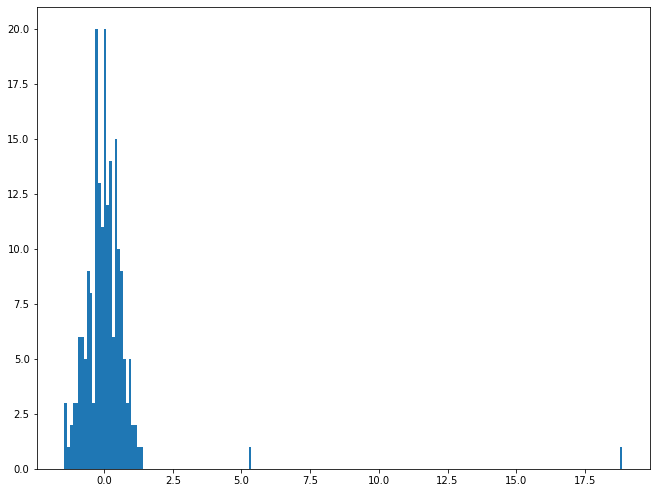

In [163]:
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)
ax.hist(image1[1], bins=200);

In [118]:
images.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

NameError: name 'image_stack' is not defined

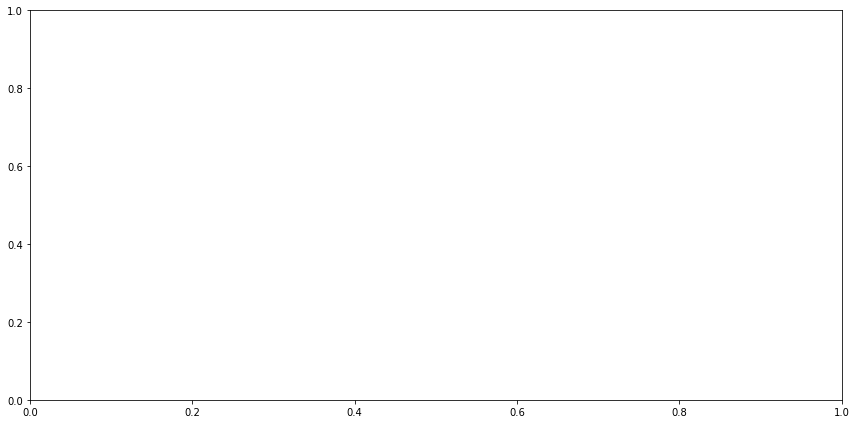

In [84]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,6)

fig.tight_layout()

ax.imshow(image_stack[:,:,0],cmap=plt.cm.gray, vmin=0, vmax=10)

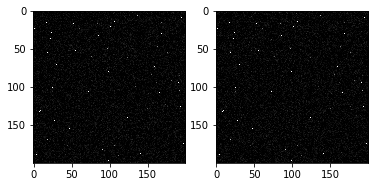

In [147]:
imagefig, ax = plt.subplots(1,2)

fig.set_size_inches(20,8.5)

#fig.tight_layout()

ax[0].imshow(image_stack[:,:,0],cmap=plt.cm.gray, vmin=0, vmax=10)
ax[1].imshow(image_stack[:,:,1],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[1,1].imshow(image_stack[:,:,2],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[1,0].imshow(image_stack[:,:,3],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[2,1].imshow(image_stack[:,:,5],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[2,0].imshow(image_stack[:,:,6],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[3,0].imshow(image_stack[:,:,7],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[3,1].imshow(image_stack[:,:,8],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[4,0].imshow(image_stack[:,:,9],cmap=plt.cm.gray, vmin=0, vmax=10)
#ax[4,1].imshow(image_stack[:,:,1],cmap=plt.cm.gray, vmin=0, vmax=10)